In [5]:
import numpy as np
from math import *

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [118]:
#Function that creates the real matrix of size n, random but symmetric entries, each of which has mean 0 and variance 1 (2 in the case of the diagonal)
def goe(n):
    v = np.random.normal(0,1,(n,n))
    v = sqrt(0.5)*(v + np.transpose(v))
    return v

#Function that creates the real matrix of size n, random but symmetric entries, with exponential distribution
def goe_exponential(n):
    v = np.random.exponential(1,(n,n))
    v = sqrt(10)*(v + np.transpose(v))
    return v

#Function that creates the real matrix of size n, random but symmetric entries, with uniform distribution from -1 to 1
def goe_uniform(n):
    v = np.random.uniform(-1,1,(n,n))
    v = sqrt(0.5)*(v + np.transpose(v))
    return v

In [119]:
#Returns a vector of dimension nd*nmem whose entries are nd eigenvalues for each of the nmem matrices
def main(nmem,nd):
    xval = np.zeros(nmem*nd)
    j = 0
    for i in range(nmem):
        hmat = goe(nd)
        eigval = np.linalg.eigvals(hmat) 
        xm = sum(eigval)/len(eigval) 
        xv = np.std(eigval)
        
        for k in range(nd):
            xval[j] = (eigval[k]-xm)/xv #standardizing the eigenvalues
            j = j + 1    

    return xval

#Returns a vector of dimension nd*nmem whose entries are nd eigenvalues for each of the nmem matrices for exponential distribution
def main_exponential(nmem,nd):
    xval = np.zeros(nmem*nd)
    j = 0
    for i in range(nmem):
        hmat = goe_exponential(nd)
        eigval = np.linalg.eigvals(hmat) 
        xm = sum(eigval)/len(eigval) 
        xv = np.std(eigval)
        
        for k in range(nd):
            xval[j] = (eigval[k]-xm)/xv #standardizing the eigenvalues
            j = j + 1    

    return xval

#Returns a vector of dimension nd*nmem whose entries are nd eigenvalues for each of the nmem matrices for uniform distribution
def main_uniform(nmem,nd):
    xval = np.zeros(nmem*nd)
    j = 0
    for i in range(nmem):
        hmat = goe_uniform(nd)
        eigval = np.linalg.eigvals(hmat) 
        xm = sum(eigval)/len(eigval) 
        xv = np.std(eigval)
        
        for k in range(nd):
            xval[j] = (eigval[k]-xm)/xv #standardizing the eigenvalues
            j = j + 1    

    return xval

In [115]:
#Gaussian
xval200 = main(50,200)
#Exponential
xval200_e = main_exponential(50,200)
#Uniform
xval200_u = main_uniform(50,200)

In [124]:
def semicircle(x):  #Wigner's Semi-Circle Law (Theory from RMT for eigenvalue distribution of GOE)
    return sqrt(4-x**2)/(2*pi)

xran = np.linspace(-2,2)
yran = list((map(semicircle,xran)))

def semicircle_exponential(x):  #Wigner's Semi-Circle Law for exponential distribution
    return 2 * sqrt(1.2**2 - x**2)/(1.2**2 * pi)#The 1.2 value is approximated by eye and to make it fit with exponential

xran_e = np.linspace(-1.2,1.2)
yran_e = list((map(semicircle_exponential,xran_e)))

#Limiting distribution (valid for large number of members in the ensemble and large matrix dimensions)

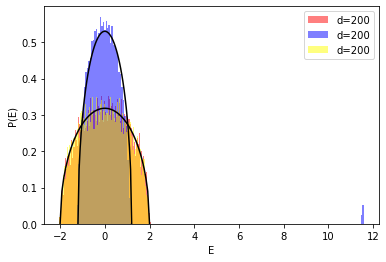

In [126]:
num_bins = 200
#Gaussian
n, bins, patches = plt.hist(xval200, num_bins, facecolor='red', alpha=0.5,  density=True, label='d=200')
plt.plot(xran,yran,c='black')
#Exponential
n, bins, patches = plt.hist(xval200_e, num_bins, facecolor='blue', alpha=0.5,  density=True, label='d=200')
plt.plot(xran_e,yran_e,c='black')
#Uniform
n, bins, patches = plt.hist(xval200_u, num_bins, facecolor='yellow', alpha=0.5,  density=True, label='d=200')
# plt.plot(xran,yran,c='black') #Is the same as Gaussian

plt.xlabel('E')
plt.ylabel('P(E)')
plt.legend()

plt.show()

Both exponential and uniform distributions obey Wigner's semicircle law. However, there are some big eigenvalues which are putside of the semicircle. And the exponential doesn't obey exactly the same law since it's a different semicircle.